In [207]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"robinugrahairianto","key":"b69af529253dd758d54048ea66bc7221"}'}

In [208]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [209]:
!kaggle datasets download -d shubh0799/churn-modelling

Dataset URL: https://www.kaggle.com/datasets/shubh0799/churn-modelling
License(s): CC0-1.0
churn-modelling.zip: Skipping, found more recently modified local copy (use --force to force download)


In [210]:
!unzip /content/churn-modelling.zip -d churn
!ls churn

Archive:  /content/churn-modelling.zip
replace churn/Churn_Modelling.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Churn_Modelling.csv


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [212]:
df = pd.read_csv("/content/churn/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [213]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [215]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


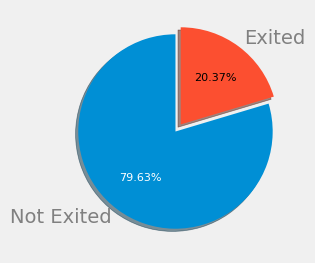

In [216]:
values = df.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (4, 3), dpi = 100)
explode = (0, 0.09)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

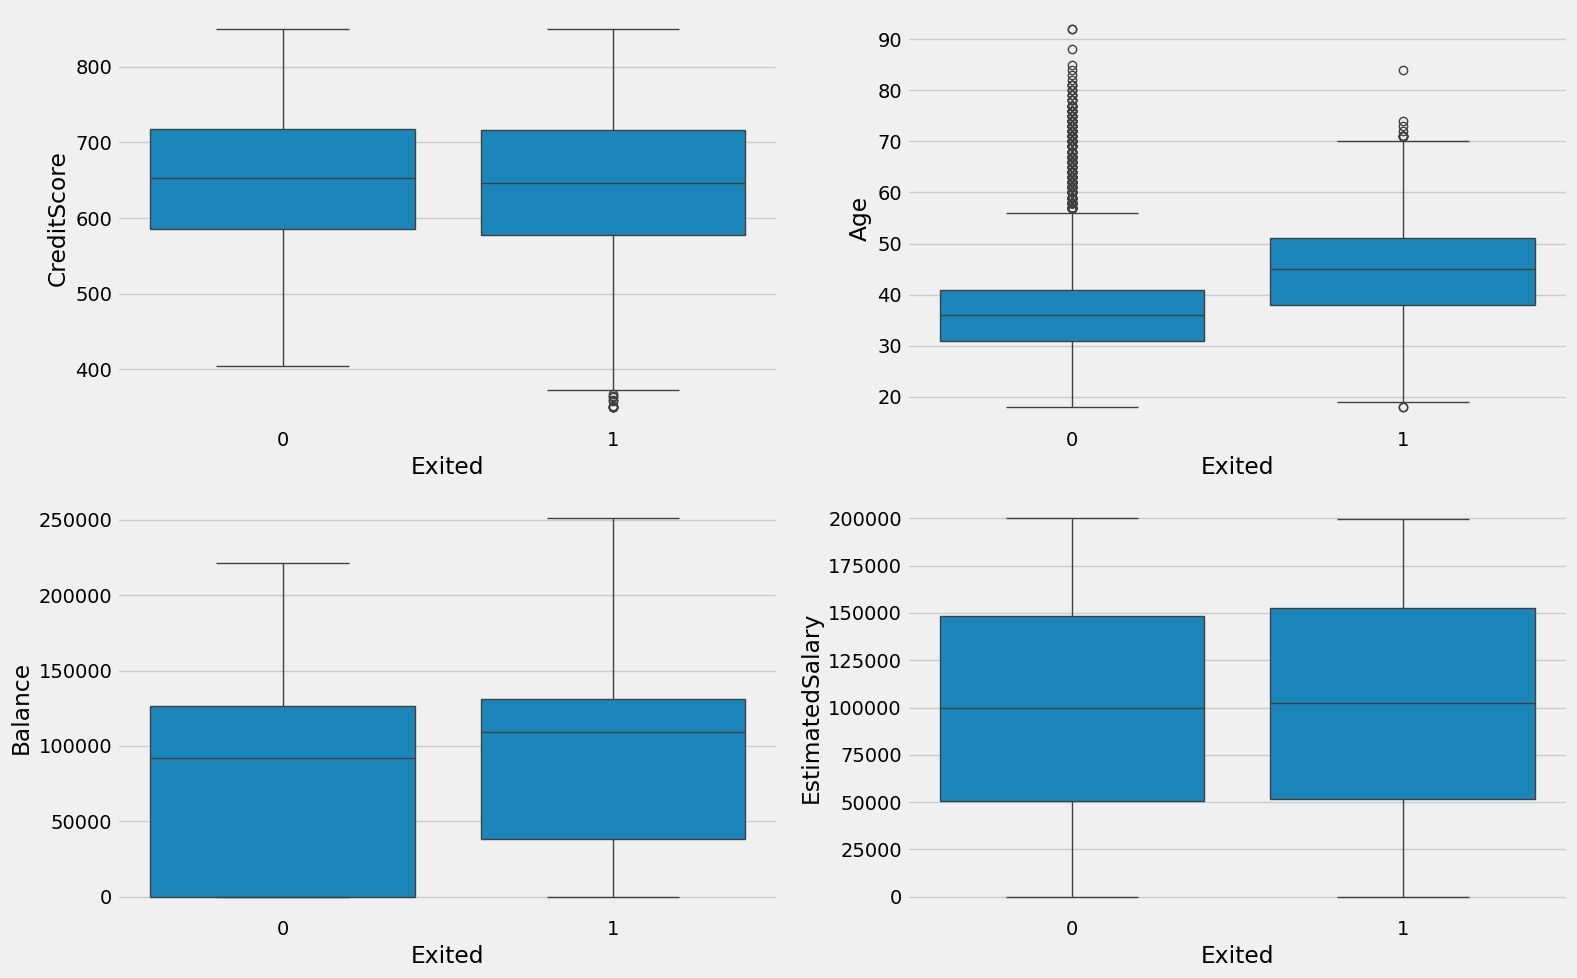

In [217]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax = ax[1][1])

plt.tight_layout()
plt.show()

<Axes: xlabel='Exited', ylabel='count'>

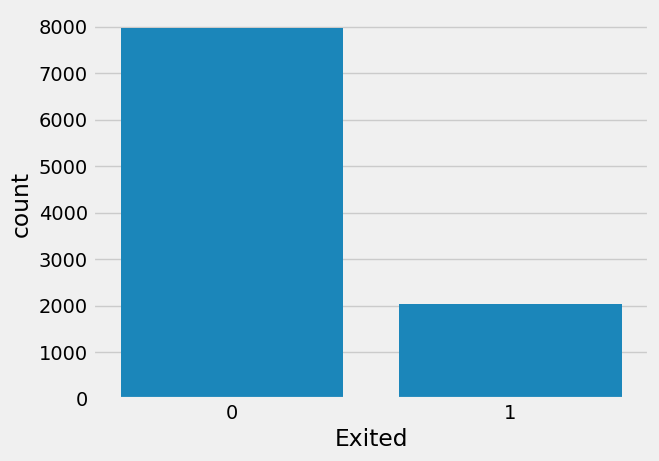

In [218]:
sns.countplot(x='Exited',data=df)

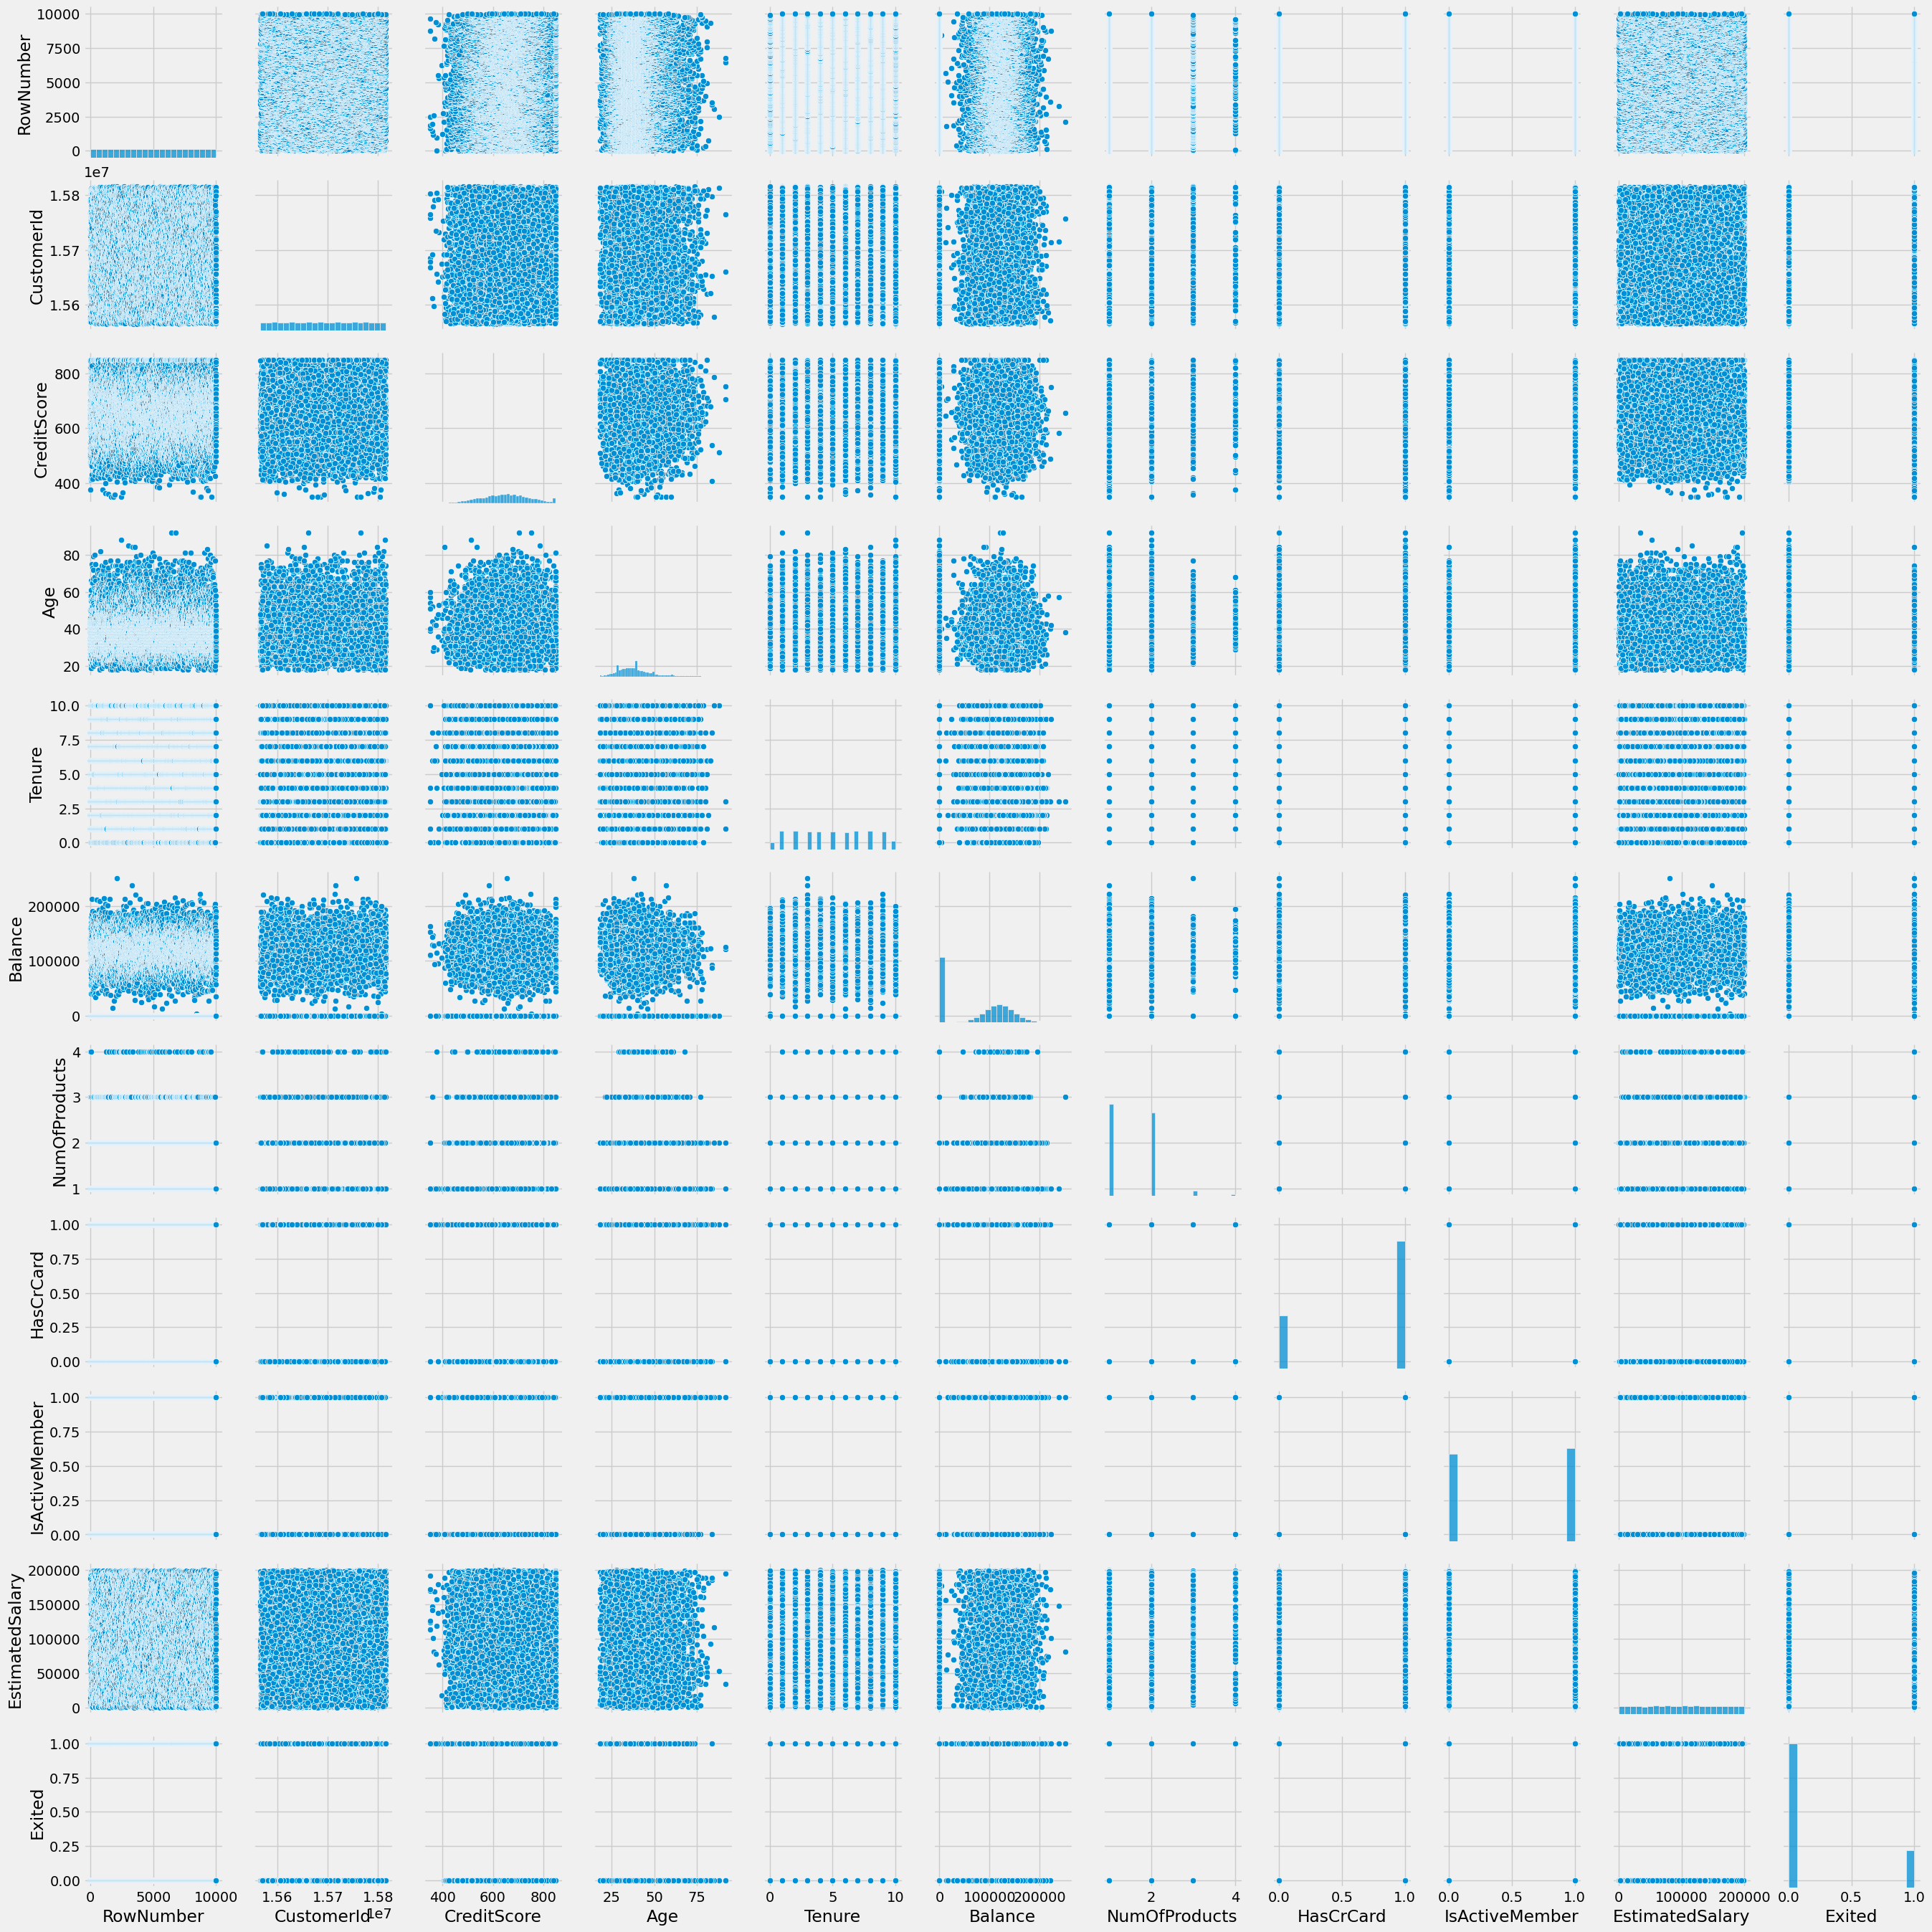

In [219]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Tenure'>

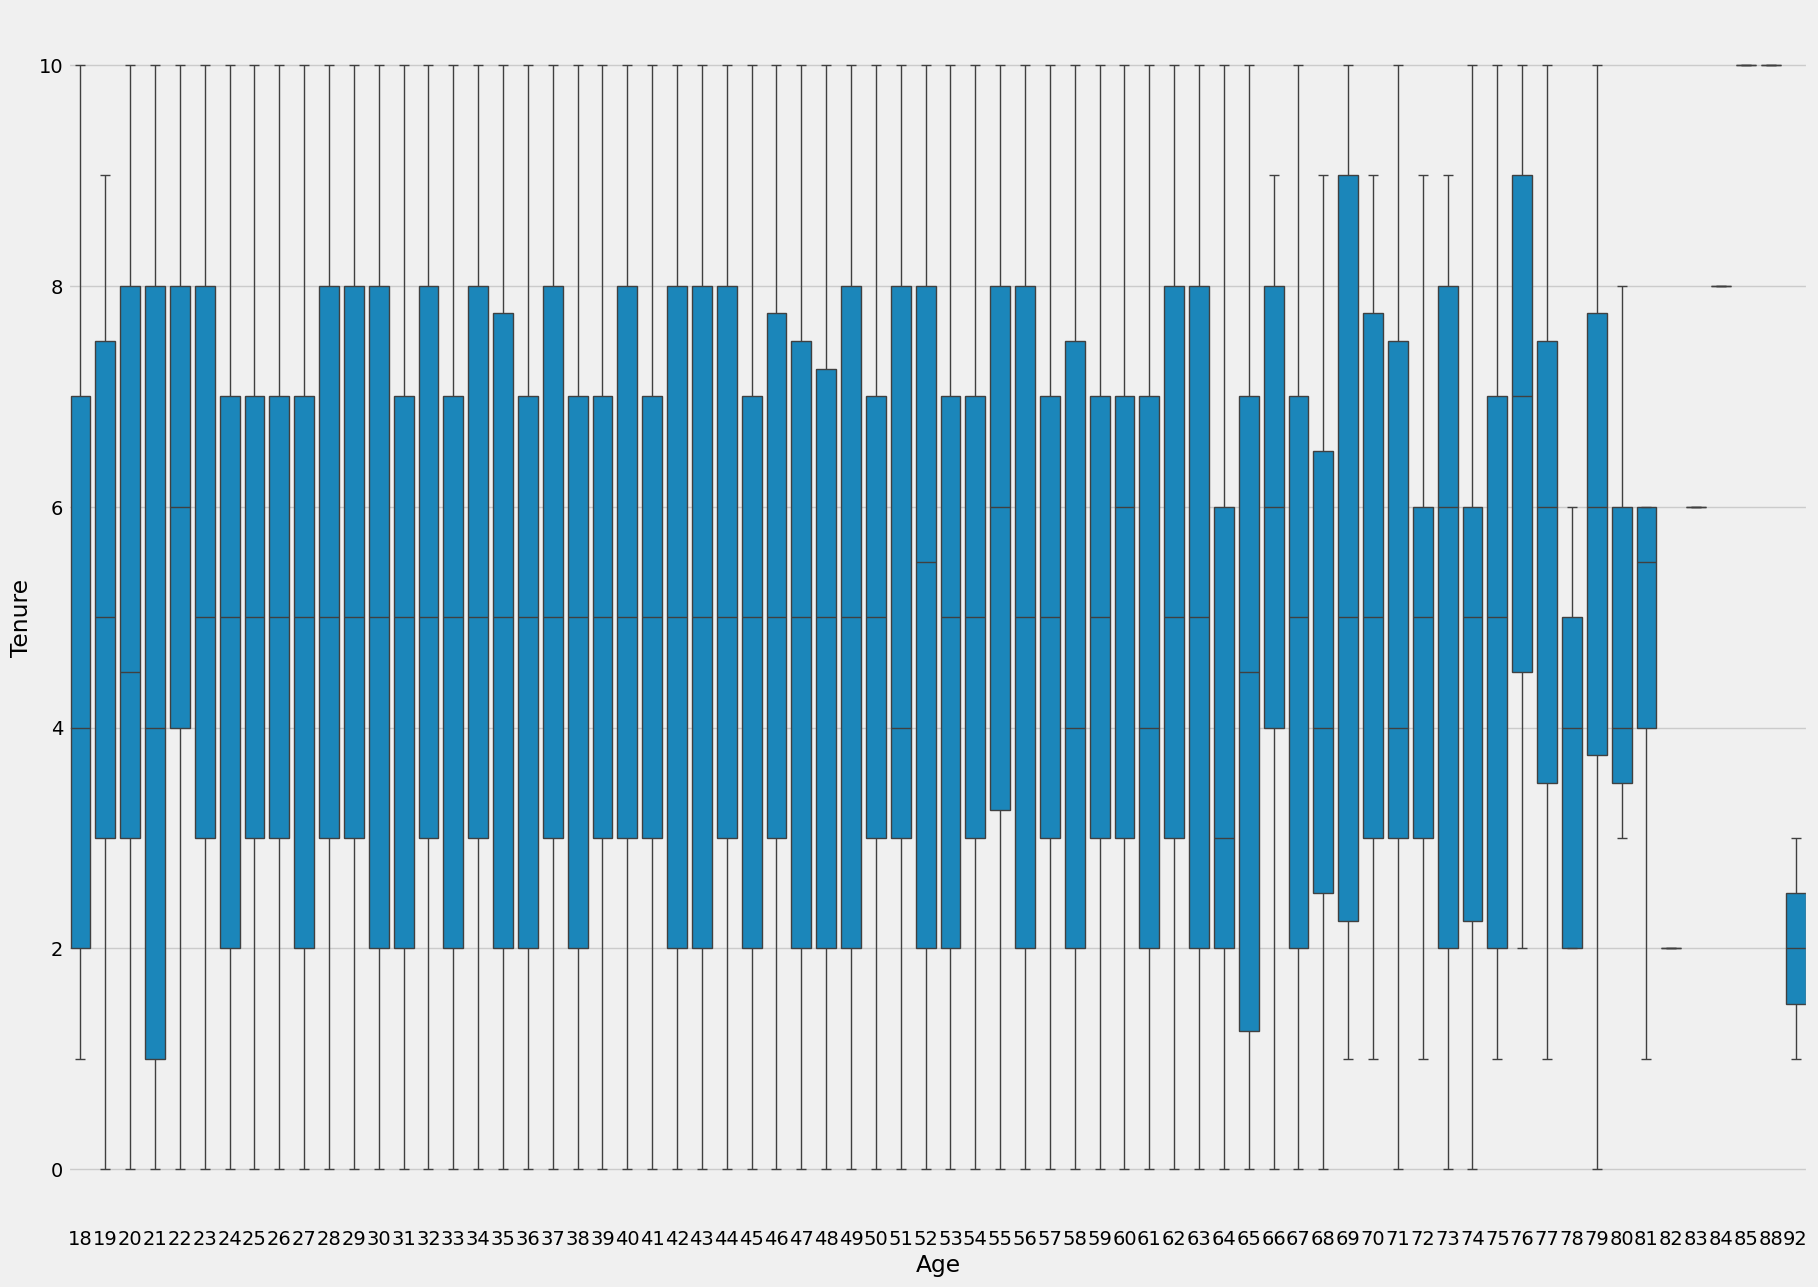

In [220]:
plt.subplots(figsize=(20,15))
sns.boxplot(x='Age', y='Tenure', data=df)

In [221]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [222]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [223]:
df['Geography'] = df['Geography'].map({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df['Gender'] = df['Gender'].map({'Male' : 0, 'Female' : 1})

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [224]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [226]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [227]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [228]:
# initializing ann
model = Sequential()

# adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the third hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# adding the output layer
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set

model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6883 - loss: 0.6487 - val_accuracy: 0.7952 - val_loss: 0.5472
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8011 - loss: 0.4840 - val_accuracy: 0.8164 - val_loss: 0.4149
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8236 - loss: 0.4106 - val_accuracy: 0.8484 - val_loss: 0.3659
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8375 - loss: 0.3967 - val_accuracy: 0.8516 - val_loss: 0.3586
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8411 - loss: 0.3835 - val_accuracy: 0.8560 - val_loss: 0.3557
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8417 - loss: 0.3900 - val_accuracy: 0.8564 - val_loss: 0.3500
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8324 - loss: 0.4002 - val_accuracy: 0.8572 - val_loss: 0.3468
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8366 - loss: 0.3851 - val_accu

In [229]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8594 - loss: 0.3318
Accuracy of model is 0.8592000007629395


In [231]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [233]:
import pickle

filename = "churn.sav"
pickle.dump(lr,open(filename,'wb'))